In [2]:
import requests, zipfile, io
from datetime import datetime
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from copy import deepcopy
from tqdm import tqdm
from shapely.geometry import Point, Polygon, box, shape
from src.visualization.visualize import kdeplot
from src.data.census.canada.prepare_ca_data import create_hexgrid
from src.data.accessibility.urban_access import create_hex_access
from src.data.accessibility.urban_access import access_score
import osmnx as ox
%matplotlib inline

In [3]:
city = "Nottingham"
city_initials = "NTH"
area = ox.gdf_from_place(city)
access = gpd.read_file(f"../../data/processed/accessibility/pois/points_access/{city_initials}_access.shp")

In [4]:
hex_res = 9 # 9 = 415m diameter, 8
hexgrid = create_hexgrid(area[['geometry']].to_crs(epsg=4326), hex_res=hex_res, plot=False)
hexgrid.reset_index(drop=True, inplace=True)
hexgrid.crs = {'init': 'epsg:4326', 'no_defs': True}

C:\Users\Leonardo\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [5]:
urban_access = create_hex_access(access = access, hexgrid = hexgrid, fillna = None, fillna_value = None)
urban_access = access_score(urban_access, outlier_method = 'winsorize')

C:\Users\Leonardo\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:61: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326', 'no_defs': True} != {'init': 'epsg:4326'})
  "(%s != %s)" % (left_df.crs, right_df.crs)


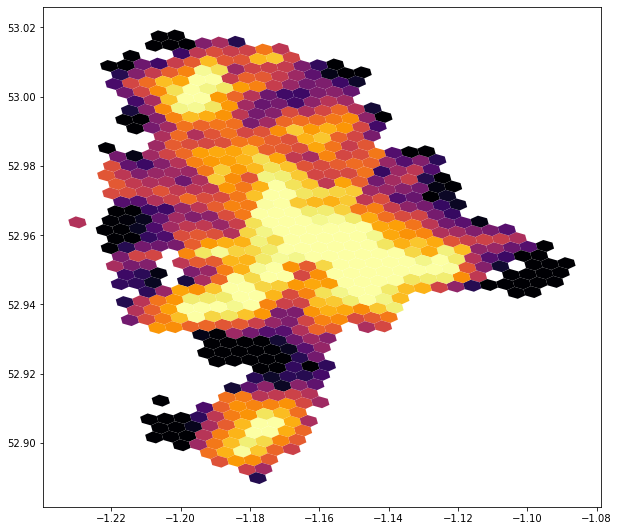

In [6]:
# fig, ax = plt.subplots(ncols=1, figsize=(18,8))
urban_access.plot(column='accessibility', categorical=False, legend=False, cmap = 'inferno', figsize=(10,10))

In [7]:
urban_access.to_file(f"../../data/processed/accessibility/poly/hex/{city_initials}_hex_access_score.shp")

In [23]:
urban_access

,index,geometry,hex_id_9,active_liv,community_,education,food_choic,health_wel,mobility,nightlife,y,x,osmid,accessibility
0,0,"POLYGON ((4.27573 52.10368, 4.27320 52.10414, ...",89196b84247ffff,154.280525,450.560524,475.081898,219.739951,323.795052,112.292624,345.437647,52.102287,4.273733,6.809261e+08,0.926720
1,1,"POLYGON ((4.28174 52.07505, 4.28207 52.07346, ...",89196b85dcfffff,170.845356,353.407179,149.410393,112.776894,268.128644,285.231357,293.312501,52.074775,4.284588,1.494389e+09,0.978137
2,2,"POLYGON ((4.35451 52.08782, 4.35197 52.08828, ...",89196b84cc3ffff,75.622647,211.355059,247.429526,210.650646,265.109648,337.384292,277.222943,52.087076,4.353233,2.187225e+09,0.965098
3,3,"POLYGON ((4.22997 52.07833, 4.23250 52.07787, ...",89196b85e0bffff,72.078668,2116.996745,881.327677,72.078668,1842.583659,1555.634684,2018.986654,52.078360,4.232199,1.095519e+09,0.027376
4,4,"POLYGON ((4.29492 52.08184, 4.29239 52.08230, ...",89196b8436fffff,47.497346,147.478769,200.050847,121.779385,194.691270,252.005153,165.571463,52.080524,4.293337,6.092174e+08,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,1096,"POLYGON ((4.28836 52.02026, 4.29088 52.01980, ...",89196bba08fffff,78.921049,2568.005073,578.208367,572.948440,470.234197,246.550194,3986.670887,52.021913,4.291227,1.596203e+09,0.275540
922,1097,"POLYGON ((4.30310 52.11248, 4.30343 52.11089, ...",89196b84053ffff,598.468087,1780.048917,974.679277,810.025002,1027.325739,1152.014721,1756.091642,52.111159,4.305067,2.113506e+09,0.146187
923,1098,"POLYGON ((4.26342 52.10438, 4.26375 52.10279, ...",89196b8424bffff,214.151941,725.055179,1128.960772,122.707412,808.232181,382.596534,539.544462,52.103495,4.266281,2.741790e+09,0.656706
924,1100,"POLYGON ((4.33299 52.06266, 4.33046 52.06312, ...",89196b84843ffff,79.804911,276.992112,134.422000,119.018133,134.326555,123.901044,166.389244,52.061816,4.331123,2.179153e+09,1.000000
